# TinyML - Gaussian Mixture ModelGaussian Mixture Model

## 1. Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [2]:
df = pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 3. Dataset Visualization 

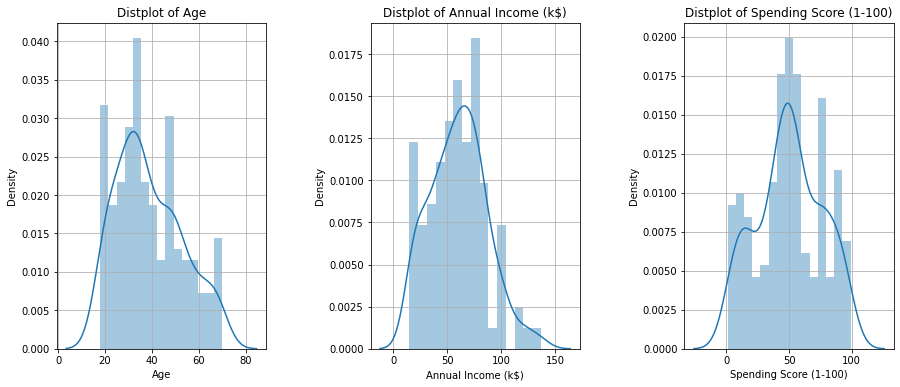

In [5]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
    plt.grid()
plt.show()

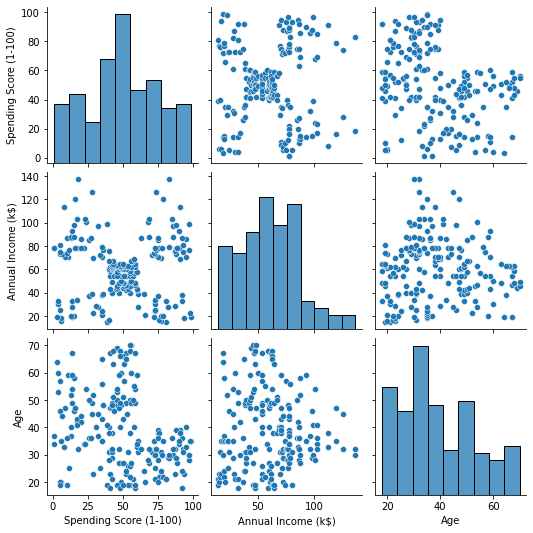

In [6]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'])

## 4. Evaluation Methods

In [7]:
X = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

### 4.1 Likelihood Ratio Test Statistic

In [8]:
# Fit GMMs with different numbers of components
n_components_range = range(1, 20)
models = [GaussianMixture(n, random_state=42).fit(X) for n in n_components_range]
bic_scores = [model.bic(X) for model in models]  # Bayesian Information Criterion (BIC) scores

# Likelihood Ratio Test
lrts = []
for i in range(len(bic_scores) - 1):
    lr = 2 * (models[i].score(X) - models[i + 1].score(X))  # Likelihood ratio statistic
    lrts.append(lr)

  File "c:\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


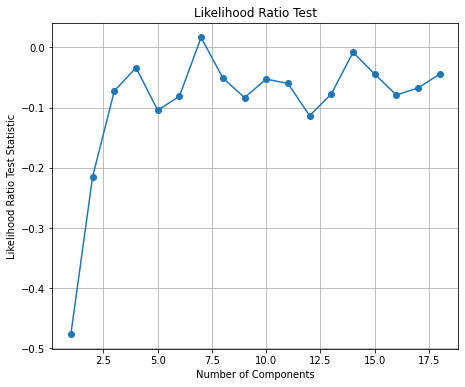

In [9]:
# Plot Likelihood Ratio Test statistic
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(lrts) + 1), lrts, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Likelihood Ratio Test Statistic')
plt.title('Likelihood Ratio Test')
plt.grid()

### 4.2 Bayesian Information Criterion

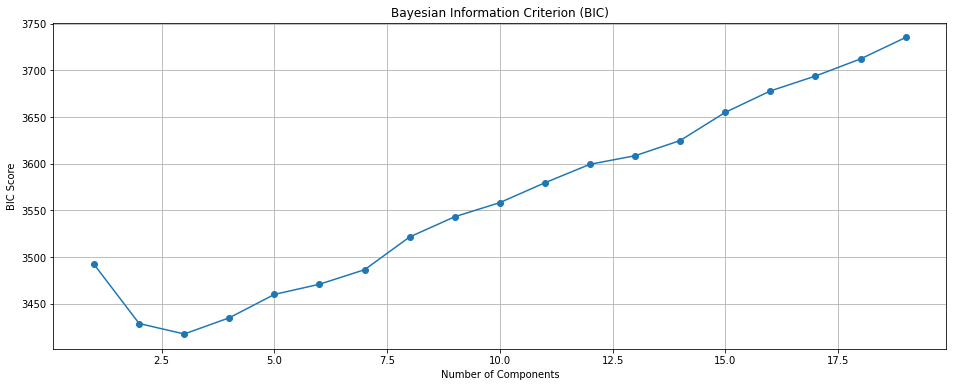

In [10]:
# Plot BIC Scores
plt.figure(figsize=(16, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('Bayesian Information Criterion (BIC)')
plt.grid()


In [11]:
# Perform hypothesis test
threshold = 3.84  # Threshold for chi-square distribution at significance level alpha=0.05 with df=1
num_components = np.argmax(lrts) + 1  # Number of components with maximum likelihood

print("Selected Number of Components (Clusters):", num_components)

Selected Number of Components (Clusters): 7


## 5. GMM Model

In [12]:
algorithm = (GaussianMixture(n_components = num_components ,init_params='k-means++' ,max_iter=300, 
                        tol=0.0001,  random_state= 42) )
algorithm.fit(X)

GaussianMixture(init_params='k-means++', max_iter=300, n_components=7,
                random_state=42, tol=0.0001)

In [13]:
y_GMM = algorithm.fit_predict(X)

In [14]:
df['cluster'] = pd.DataFrame(y_GMM)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,6
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [15]:
from matplotlib.colors import LogNorm

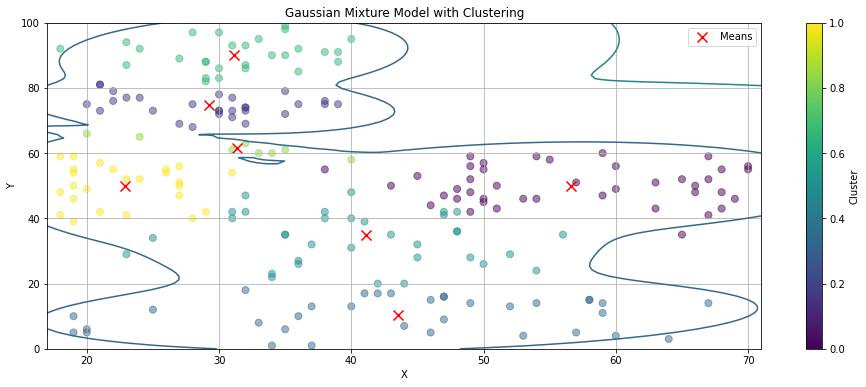

In [16]:
# Predict the cluster labels
labels =y_GMM

# Create a meshgrid to plot the probability density
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = -algorithm.score_samples(np.vstack([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)

# Plot data points colored by cluster
plt.figure(figsize=(16, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.5)

# Plot contours of the algorithm
plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), cmap='viridis')

# Plot means of the components
plt.scatter(algorithm.means_[:, 0], algorithm.means_[:, 1], marker='x', s=100, c='red', label='Means')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model with Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()

plt.show()

In [17]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 18
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        ),
    width=1200,  
    height=800,  
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## 6. Obtaining the model to be implemented in the microcontroller

In [18]:
def convert_to_cpp_code(means, covariances, coefficients):
    cpp_code = "#include <math.h>\n"
    cpp_code += "using namespace std;\n \n \n"
    cpp_code += "const int num_components = {};\n".format(means.shape[0])
    cpp_code += "const int num_features = {};\n\n".format(means.shape[1])
    
    cpp_code += "namespace TKSF {\n"
    cpp_code += "namespace ML {\n"
    cpp_code += "namespace Port {\n"
    cpp_code += "class GMM {\n"


    cpp_code += "private: \n\n"
    


    cpp_code += "float means[num_components][num_features] = {\n"
    for i in range(means.shape[0]):
        cpp_code += "  {" + ", ".join(map(str, means[i])) + "},\n"
    cpp_code += "};\n\n"

    cpp_code += "float covariances[num_components][num_features][num_features] = {\n"
    for i in range(covariances.shape[0]):
        cpp_code += "  {{" + "}, {".join([", ".join(map(str, row)) for row in covariances[i]]) + "}},\n"
    cpp_code += "};\n\n"

    cpp_code += "float coefficients[num_components] = {" + ", ".join(map(str, coefficients)) + "};\n\n"

    cpp_code += "float component_pdf(float x[num_features], float mean[num_features], float covariance[num_features][num_features]) {\n"
    cpp_code += "  float det = covariance[0][0] * covariance[1][1] - covariance[0][1] * covariance[1][0];\n"
    cpp_code += "  float inv_cov[num_features][num_features] = {{covariance[1][1] / det, -covariance[0][1] / det}, {-covariance[1][0] / det, covariance[0][0] / det}};\n"
    cpp_code += "  float exponent = -0.5 * (inv_cov[0][0] * (x[0] - mean[0]) * (x[0] - mean[0]) + 2 * inv_cov[0][1] * (x[0] - mean[0]) * (x[1] - mean[1]) + inv_cov[1][1] * (x[1] - mean[1]) * (x[1] - mean[1]));\n"
    cpp_code += "  float coefficient = 1.0 / sqrt(2 * M_PI * det);\n"
    cpp_code += "  return coefficient * exp(exponent);\n"
    cpp_code += "}\n\n\n\n"

    cpp_code += "public: \n\n"
    cpp_code += "int predict(float x[num_features]) {\n"
    cpp_code += "  float probabilities[num_components] = {0};\n"
    cpp_code += "  for (int i = 0; i < num_components; ++i) {\n"
    cpp_code += "    probabilities[i] = coefficients[i] * component_pdf(x, means[i], covariances[i]);\n"
    cpp_code += "  }\n"
    cpp_code += "  int maxIndex = 0;\n"
    cpp_code += "  for (int i = 1; i < num_components; ++i) {\n"
    cpp_code += "    if (probabilities[i] > probabilities[maxIndex]) {\n"
    cpp_code += "      maxIndex = i;\n"
    cpp_code += "    }\n"
    cpp_code += "  }\n"
    cpp_code += "  return maxIndex;\n"
    cpp_code += "}\n"




    cpp_code += "};\n"
    cpp_code += "}\n"
    cpp_code += "}\n"
    cpp_code += "}\n" 
    return cpp_code

In [19]:
means = algorithm.means_
covariances =  algorithm.covariances_
coefficients = algorithm.weights_
cpp_code = convert_to_cpp_code(means, covariances, coefficients)

## 7. Saves the template in a .h file

In [20]:
with open('./GMM/GMM.h', 'w') as file:
    file.write(cpp_code)